In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [2]:
def gen_sig(signal_length=100, gaussian_level=51):
    sig = np.zeros(signal_length)
    peaks = np.random.randint(0, signal_length, 1)
    sig[peaks] = 1
    window = signal.gaussian(gaussian_level, std=4)
    for i in range(peaks[0] - (gaussian_level // 2), peaks[0] + (gaussian_level // 2)+1):
        if i >= 0 and i < signal_length:
            sig[i] = window[i - (peaks[0] - (gaussian_level // 2))]
    return sig, peaks

In [3]:
def gen_distance_peak_data(num_data=1000, channel=2, signal_length=100):
    X = np.zeros((num_data, channel, signal_length))
    Y = np.zeros((num_data, ))
    for i in range(num_data):
        peaks = []
        for j in range(channel):
            sig, peak = gen_sig()
            X[i,j] = sig
            peaks.append(peak)
        Y[i] = peaks[1] - peaks[0]
    return X, Y

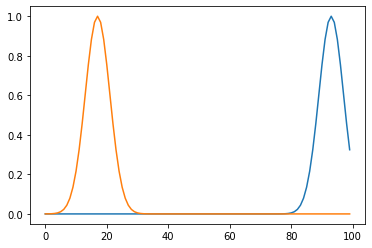

(1000, 2, 100)
-76.0


In [26]:
X, Y = gen_distance_peak_data()
x = np.arange(100)
plt.plot(x, X[0,0])
plt.plot(x, X[0,1])
plt.show()
print(X.shape)
print(Y[0])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


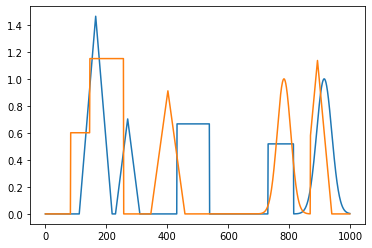

(1, 2, 1000)
-132.0


In [32]:
%load_ext autoreload
%autoreload 2
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..")
from data import gen_data

padding_length = 0
G = gen_data.DataGenerator(1, 2, 1000,padding_length=padding_length)
G.addPeakShape(["triangle", "square"])
#print(G.generate_peak_window("gaussian", 10, 2))
X, Y = G.generate(noisy_peak_num=4)
x = np.arange(1000+2*padding_length)
plt.plot(x, X[0,0])
plt.plot(x, X[0,1])
plt.show()
print(X.shape)
print(Y[0])